In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
pwd

'/Users/pspuri22/Exercises/GTATL201908DATA3'

In [3]:
cd ..

/Users/pspuri22/Exercises


In [4]:
pwd

'/Users/pspuri22/Exercises'

In [6]:
cd machine-learning-challenge/

/Users/pspuri22/Exercises/machine-learning-challenge


# Read the CSV and Perform Basic Data Cleaning

In [7]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [8]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_period', 'koi_time0bk','koi_slogg','koi_srad','ra']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [9]:
y = df["koi_disposition"]
y.head(4)

0         CONFIRMED
1    FALSE POSITIVE
2    FALSE POSITIVE
3         CONFIRMED
Name: koi_disposition, dtype: object

In [10]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(selected_features, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
# Scale your data
X = selected_features

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
# X_scaler

In [15]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
X_train_scaled

array([[-0.43647294, -0.57184423, -0.42255034, ...,  0.05414964,
        -0.10599719,  0.49936552],
       [-0.43647294,  1.74872798, -0.47343342, ...,  0.62499662,
        -0.16225251, -1.57636903],
       [ 2.29109277, -0.57184423, -0.41509889, ...,  0.40439041,
        -0.13378183,  0.72943663],
       ...,
       [-0.43647294,  1.74872798, -0.42776623, ..., -0.92606968,
         0.19277346,  1.0815803 ],
       [ 2.29109277, -0.57184423, -0.451432  , ..., -1.20580745,
         0.15589878,  1.01466325],
       [-0.43647294, -0.57184423, -0.46046488, ...,  0.46124768,
        -0.15213341,  0.56843989]])

k: 1, Train/Test Score: 1.000/0.658
k: 3, Train/Test Score: 0.830/0.686
k: 5, Train/Test Score: 0.798/0.696
k: 7, Train/Test Score: 0.784/0.700
k: 9, Train/Test Score: 0.771/0.699
k: 11, Train/Test Score: 0.765/0.701
k: 13, Train/Test Score: 0.762/0.694
k: 15, Train/Test Score: 0.759/0.699
k: 17, Train/Test Score: 0.751/0.696
k: 19, Train/Test Score: 0.743/0.701


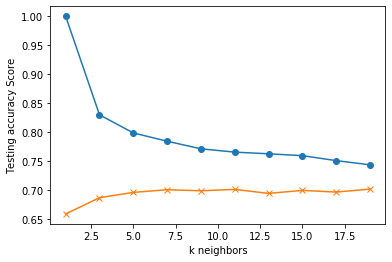

In [17]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Train the Model



In [28]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)

train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)

In [29]:

print('k=15 Test Acc: %.3f' % knn.score(X_test, y_test))

k=15 Test Acc: 0.485


In [23]:
knnPredictions = knn.predict(X_test_scaled)

In [24]:
knnPredictions

array(['FALSE POSITIVE', 'CANDIDATE', 'CONFIRMED', ..., 'CONFIRMED',
       'CANDIDATE', 'CONFIRMED'], dtype=object)

In [25]:
X_test_scaled

array([[ 2.29109277, -0.57184423,  0.26672986, ...,  1.08895193,
        -0.2197084 ,  0.74498869],
       [-0.43647294, -0.57184423,  0.38450878, ...,  0.63636807,
        -0.16328157,  1.18276093],
       [-0.43647294, -0.57184423, -0.46966102, ...,  0.63409378,
        -0.17082801, -0.14131938],
       ...,
       [-0.43647294, -0.57184423, -0.13532238, ...,  0.34980744,
        -0.14029921,  0.64564042],
       [-0.43647294, -0.57184423, -0.41567459, ..., -0.38706277,
        -0.01578286,  0.53147807],
       [-0.43647294, -0.57184423, -0.47142522, ...,  0.35208173,
        -0.14647358,  0.0552932 ]])

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [35]:

# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)

['FALSE POSITIVE' 'CANDIDATE' 'CONFIRMED' ... 'CONFIRMED' 'CONFIRMED'
 'CONFIRMED']


In [31]:
# Train the model with GridSearch
y.head(10)

0         CONFIRMED
1    FALSE POSITIVE
2    FALSE POSITIVE
3         CONFIRMED
4         CONFIRMED
5         CONFIRMED
6         CONFIRMED
7         CONFIRMED
8         CONFIRMED
9         CONFIRMED
Name: koi_disposition, dtype: object

In [32]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.66      0.25      0.36       411
FALSE POSITIVE       0.49      0.93      0.64       484
     CANDIDATE       0.98      0.78      0.87       853

      accuracy                           0.69      1748
     macro avg       0.71      0.65      0.62      1748
  weighted avg       0.77      0.69      0.68      1748

